In [158]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

In [159]:
def print_results_crossvalidation(func, X_test, y_test):
  
  std_best_score = func.cv_results_["std_test_score"][func.best_index_]
  print(f"Best parameters: {func.best_params_}")
  print(f"Mean CV score: {func.best_score_:}")
  print(f"Standard deviation of CV score: {std_best_score:}")
  print("Test Score:".format(func.score(X_test, y_test)))

def report(y_true, y_pred):
    
  class_report = metrics.classification_report(y_true, y_pred)
  print(class_report)
  conf_matrix = confusion_matrix(y_true, y_pred, normalize = "all")
  conf_matrix = pd.DataFrame(conf_matrix, ["Class 0", "Class 1", " Class 2", "Class 3", " Class 4"],  ["Class 0", "Class 1", " Class 2", "Class 3", " Class 4"])
  sns.heatmap(conf_matrix, annot = True).set(xlabel = "Assigned Class", ylabel = "True Class", title = "Confusion Matrix")
     

In [160]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 10

In [161]:
# Load data
df = pd.read_csv("GroupProjectDataSet.csv", sep=',')
print('Shape of data frame:', df.shape)
df.head(10)

Shape of data frame: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,NaN,IR1,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2010.0,WD,Family,0.0
5,1014.0,30.0,RM,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Normal,0.0
6,1404.0,20.0,RL,49.0,15256.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,2.0
7,602.0,50.0,RM,50.0,9000.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2007.0,WD,Normal,1.0
8,1183.0,60.0,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7.0,2007.0,WD,Abnorml,4.0
9,688.0,160.0,FV,NaN,5105.0,Pave,NaN,IR2,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Normal,1.0


In [162]:
# Filling missing values for variables where appropriate

df["PoolQC"] = df["PoolQC"].fillna(value = "None")
df["MiscFeature"] = df["MiscFeature"].fillna(value = "None")
df["Alley"] = df["Alley"].fillna(value = "None")
df["Fence"] = df["Fence"].fillna(value = "None")
df["FireplaceQu"] = df["FireplaceQu"].fillna(value = "None")
df["GarageCond"] = df["GarageCond"].fillna(value = "None")
df["GarageType"] = df["GarageType"].fillna(value = "None")
df["GarageFinish"] = df["GarageFinish"].fillna(value = "None")
df["GarageQual"] = df["GarageQual"].fillna(value = "None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(value = "None")
df["BsmtExposure"] = df["BsmtExposure"].fillna(value = "None")
df["BsmtQual"] = df["BsmtQual"].fillna(value = "None")
df["BsmtCond"] = df["BsmtCond"].fillna(value = "None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(value = "None")

<AxesSubplot:>

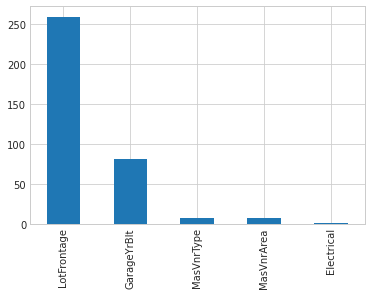

In [163]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.plot.bar()

In [164]:
# Percentage of missing values for the variables

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Share'])
missing_data.head(5)

,Nr. of missing values,Share
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrType,8.0,0.005479
MasVnrArea,8.0,0.005479
Electrical,1.0,0.000685


In [165]:
#####Dealing with Categorical Features (Encoding Categorical Variables) / Splitting Into X and y

# Numerical variables that should be handled as categorical variables
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})
df = df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [166]:
# Assign response to y
y = df.iloc[:, -1]

# Factorize categorical values, assign output to X
# create (multiple) dummy variables for a categorical variable
# panda way
X = pd.get_dummies(df.iloc[:, :-1])
X.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,530.0,NaN,32668.0,6.0,3.0,1957.0,1975.0,NaN,1219.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,492.0,79.0,9490.0,6.0,7.0,1941.0,1950.0,0.0,403.0,165.0,...,0,0,0,1,0,0,0,0,1,0
2,460.0,NaN,7015.0,5.0,4.0,1950.0,1950.0,161.0,185.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,280.0,83.0,10005.0,7.0,5.0,1977.0,1977.0,299.0,392.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,656.0,21.0,1680.0,6.0,5.0,1971.0,1971.0,381.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [167]:
#Ab hier übernehmen

<AxesSubplot:>

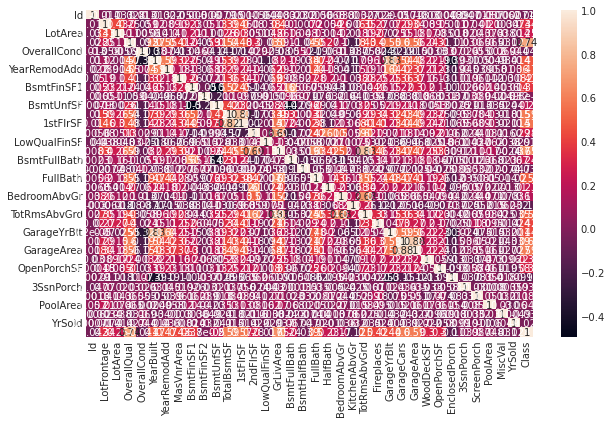

In [168]:
## Feature Selection##
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute the correlation matrix
corr = df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

In [169]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Sort the correlations with respect to 'Class'
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)

# Print the correlations
print(corr_with_class)

# Select the top 10 features with the highest correlation
top_features = corr_with_class.nlargest(10).index

# Print the top features
print(top_features)

Class            1.000000
OverallQual      0.742574
GrLivArea        0.651674
GarageCars       0.595107
GarageArea       0.594322
TotalBsmtSF      0.586828
1stFlrSF         0.570644
TotRmsAbvGrd     0.502809
FullBath         0.495387
YearRemodAdd     0.474712
YearBuilt        0.473457
GarageYrBlt      0.442822
MasVnrArea       0.425827
Fireplaces       0.417341
BsmtFinSF1       0.369270
LotFrontage      0.339814
OpenPorchSF      0.302405
WoodDeckSF       0.301702
2ndFlrSF         0.280965
LotArea          0.247795
BsmtFullBath     0.235471
HalfBath         0.232521
BsmtUnfSF        0.201491
BedroomAbvGr     0.172087
ScreenPorch      0.087483
PoolArea         0.047851
3SsnPorch        0.039062
BsmtFinSF2      -0.000068
LowQualFinSF    -0.016682
YrSold          -0.028048
MiscVal         -0.030503
BsmtHalfBath    -0.039215
OverallCond     -0.040961
Id              -0.041634
EnclosedPorch   -0.110935
KitchenAbvGr    -0.122189
Name: Class, dtype: float64
Index(['Class', 'OverallQual', 'GrLi

In [170]:
##VIF## 

# load the data and select features
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
        'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]

# add a constant to X for the intercept
X = sm.add_constant(X)

# calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# print the VIF table
print(vif)


     VIF Factor      features
0  13808.997434         const
1      2.598408   OverallQual
2      4.804752     GrLivArea
3      5.126099    GarageCars
4      4.929316    GarageArea
5      3.508609   TotalBsmtSF
6      3.666473      1stFlrSF
7      3.334664  TotRmsAbvGrd
8      2.007821      FullBath
9      1.561762  YearRemodAdd


In [171]:
#######KNN#######

In [172]:
####Partitioning of the Data Set Into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [174]:
#KNN-Model##
train_df = pd.DataFrame(data=X_train, columns=X.columns)
train_df['Class'] = y_train

test_df = pd.DataFrame(data=X_test, columns=X.columns)
test_df['Class'] = y_test

X_train = train_df[['Class', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y_train = train_df['Class']

# Initialize the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Use the trained KNN model to make predictions on the test data
X_test = test_df[['Class', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y_test = test_df['Class']
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the classification report for the KNN model on the test data
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7534246575342466
              precision    recall  f1-score   support

         0.0       0.74      0.46      0.57        37
         1.0       0.82      0.90      0.86       273
         2.0       0.62      0.56      0.59        94
         3.0       0.44      0.46      0.45        26
         4.0       0.50      0.38      0.43         8

    accuracy                           0.75       438
   macro avg       0.63      0.55      0.58       438
weighted avg       0.75      0.75      0.75       438



In [175]:
# The model correctly classified 75% of the instances in the test set.
# The report indicates that the model performs well in predicting class 1, 
# with a precision of 0.82 and a recall of 0.90, indicating that it correctly predicted a high proportion of 
# the instances belonging to this class. However, the model performed less well in predicting classes 0 and 3, 
# with a precision and recall of around 0.5. The model had moderate performance for class 2, with a precision 
#and recall of around 0.6, and poor performance for class 4, with a precision of 0.5 and a recall of 0.38.

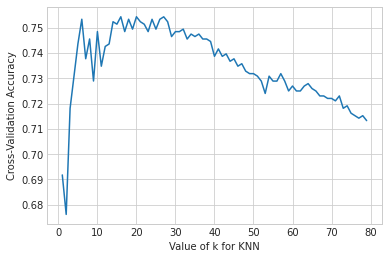

The best value of k is: 20


In [176]:
# Define a range of values for k
k_range = range(1, 80)

# Create an empty list to store the cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation scores as a function of k
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, cv_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

# Select the best value of k
best_k = np.argmax(cv_scores) + 1
print("The best value of k is:", best_k)


In [177]:
# we can set k=20 in our KNN model to get the best possible performance on this particular dataset.

In [178]:
###KNN-SMOTE####
# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X_train))
print("Number of samples after SMOTE:", len(X_train_smote))

# Train a KNN classifier on the oversampled data
knn_smote = KNeighborsClassifier(n_neighbors=20)
knn_smote.fit(X_train_smote, y_train_smote)

# Predict the test set using the KNN classifier trained on the oversampled data
y_pred_smote = knn_smote.predict(X_test)

# Compute the accuracy of the KNN model with SMOTE on the test data
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy with SMOTE:", accuracy_smote)

# Compute the classification report for the KNN model with SMOTE on the test data
report_smote = classification_report(y_test, y_pred_smote)

# Print the classification report
print(report_smote)




Number of samples before SMOTE: 1022
Number of samples after SMOTE: 3185
Accuracy with SMOTE: 0.6438356164383562
              precision    recall  f1-score   support

         0.0       0.37      0.81      0.50        37
         1.0       0.92      0.59      0.72       273
         2.0       0.56      0.73      0.63        94
         3.0       0.38      0.65      0.48        26
         4.0       0.42      0.62      0.50         8

    accuracy                           0.64       438
   macro avg       0.53      0.68      0.57       438
weighted avg       0.75      0.64      0.66       438



In [179]:
# SMOTE is used to address class imbalance by creating synthetic samples.
# However, in this case, after oversampling with SMOTE, the performance of the KNN classifier on the test set 
# actually got worse compared to the previous results without SMOTE. The accuracy dropped from 0.7534 to 0.621, 
# and the overall classification report shows lower precision and recall scores for some classes. 
#This could be due to overfitting on the training data or other factors

In [180]:
##Class Imbalance using Random Oversample
# Initialize the random oversampler with random_state=0
ros = RandomOverSampler(random_state=0)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the KNN model on the resampled training data
knn.fit(X_train_resampled, y_train_resampled)

# Use the trained KNN model to make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RandomOverSampler:", accuracy)

# Compute the classification report for the KNN model on the test data
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Accuracy with RandomOverSampler: 0.5958904109589042
              precision    recall  f1-score   support

         0.0       0.30      0.76      0.43        37
         1.0       0.90      0.54      0.67       273
         2.0       0.56      0.67      0.61        94
         3.0       0.34      0.77      0.47        26
         4.0       0.33      0.38      0.35         8

    accuracy                           0.60       438
   macro avg       0.49      0.62      0.51       438
weighted avg       0.73      0.60      0.62       438



In [181]:
#  RandomOverSampler technique to address the class imbalance in the training data. 
# The accuracy of the model after using Random Oversampling is 0.589. The drop in accuracy could be due to the 
#fact that the synthetic samples generated by Random Oversampling can add noise to the data, leading to overfitting. 

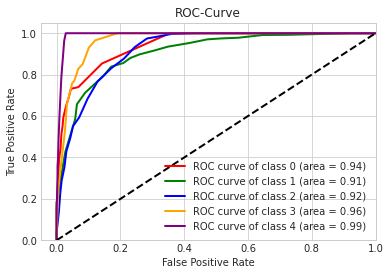

In [182]:
# Define features and target variable
X = df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y = df['Class']

# Create KNN object and run classifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

# Predict probabilities for each class
y_prob = knn.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, color in zip(range(len(set(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()


In [183]:
#####LDA#####

In [149]:
# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# LDA-Modell erstellen und anpassen
lda = LDA(solver='lsqr')
lda.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = lda.predict(X_test)

# Leistungsmaße berechnen
print('default-rate: {0: .4f}'.format(np.sum(y_test)/len(y_test)))

report = classification_report(y_test, y_pred)
print(report)

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))


default-rate:  1.2900
              precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        48
         1.0       0.83      0.91      0.87       262
         2.0       0.68      0.68      0.68        91
         3.0       0.65      0.56      0.60        27
         4.0       0.71      0.50      0.59        10

    accuracy                           0.79       438
   macro avg       0.75      0.63      0.68       438
weighted avg       0.79      0.79      0.78       438

[[ 25  23   0   0   0]
 [  4 239  17   1   1]
 [  0  26  62   2   1]
 [  0   0  12  15   0]
 [  0   0   0   5   5]]


In [150]:
# In this specific case, the default rate is 1.29, which means that the most frequent class in the test set is Class 1
# The F1-score is 0.79, which indicates that the model has good accuracy. 
# The classification report shows precision, recall, and F1-score for each class.

In [151]:
###SMOTE###
# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply SMOTE to training data
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# LDA-Modell erstellen und anpassen
lda = LDA(solver='lsqr')
lda.fit(X_train_res, y_train_res)

# Vorhersagen auf Testdaten machen
y_pred = lda.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.26      0.86      0.40        28
         1.0       0.95      0.61      0.74       287
         2.0       0.60      0.67      0.63        95
         3.0       0.29      0.63      0.39        19
         4.0       0.38      0.56      0.45         9

    accuracy                           0.64       438
   macro avg       0.50      0.67      0.53       438
weighted avg       0.79      0.64      0.68       438

[[ 24   4   0   0   0]
 [ 67 175  39   4   2]
 [  0   6  64  22   3]
 [  0   0   4  12   3]
 [  0   0   0   4   5]]


In [152]:
# Here, we have also tried to address the class imbalancing problem by applying SMOTE. 
# But this also led to a deterioration of the model.

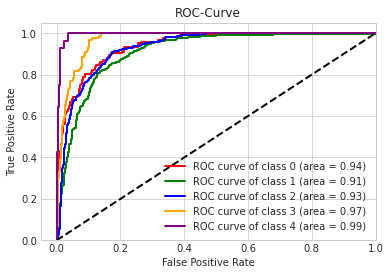

In [153]:
# Define features and target variable
X = df[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y = df['Class']

# Create LDA object and run classifier
lda = LDA(solver='lsqr')
lda.fit(X, y)

# Predict probabilities for each class
y_prob = lda.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, color in zip(range(len(set(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()


In [154]:
####QDA
# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# QDA-Modell erstellen und anpassen
qda = QDA()
qda.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = qda.predict(X_test)

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


[[ 15  13   0   0   0]
 [  9 260  16   1   1]
 [  0  16  71   7   1]
 [  0   0   4  14   1]
 [  0   0   0   8   1]]
              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58        28
         1.0       0.90      0.91      0.90       287
         2.0       0.78      0.75      0.76        95
         3.0       0.47      0.74      0.57        19
         4.0       0.25      0.11      0.15         9

    accuracy                           0.82       438
   macro avg       0.60      0.61      0.59       438
weighted avg       0.82      0.82      0.82       438



In [155]:
# The model achieves an accuracy of 0.82, and the precision and recall vary across the classes, 
# with the highest precision and recall achieved for class 1.0.

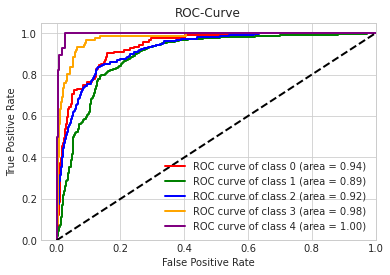

In [121]:
# Define features and target variable
X = df[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y = df['Class']

# Create QDA object and run classifier
qda = QDA()
qda.fit(X, y)

# Predict probabilities for each class
y_prob = qda.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, color in zip(range(len(set(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()
